In [1]:
# Increasing the data rate limit
# !jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [2]:
## pulling the data using the api key
## using requests library
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0d329fba-1910-4e7d-8ed3-7689bb45be33',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
     print(e)

{'status': {'timestamp': '2024-10-10T06:05:07.717Z', 'error_code': 0, 'error_message': None, 'elapsed': 2210, 'credit_count': 1, 'notice': None, 'total_count': 9859}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11771, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'pa

In [4]:
### inporting libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [4]:
# normalizing unstruccted data into a data frame
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976558e+07,1.976558e+07,...,56.5076,1.278096e+12,None,2024-10-10T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286
1,1027,Ethereum,ETH,ethereum,9394,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203803e+08,1.203803e+08,...,13.5806,2.891111e+11,None,2024-10-10T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286
2,825,Tether USDt,USDT,tether,99937,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.198563e+11,1.213636e+11,...,5.6233,1.212169e+11,None,2024-10-10T06:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-10 06:06:11.990286
3,1839,BNB,BNB,bnb,2258,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459322e+08,1.459322e+08,...,3.9157,8.335388e+10,None,2024-10-10T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286
4,5426,Solana,SOL,solana,753,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.693723e+08,5.862780e+08,...,3.0951,8.229634e+10,None,2024-10-10T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286
5,3408,USDC,USDC,usd-coin,22374,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.475099e+10,3.475099e+10,...,1.6321,3.474446e+10,None,2024-10-10T06:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-10 06:06:11.990286
6,52,XRP,XRP,xrp,1403,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.664506e+10,9.998714e+10,...,1.4029,5.272435e+10,None,2024-10-10T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286
7,74,Dogecoin,DOGE,dogecoin,1079,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.463043e+11,1.463043e+11,...,0.7439,1.583424e+10,None,2024-10-10T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286
8,1958,TRON,TRX,tron,1046,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.656562e+10,8.656563e+10,...,0.6491,1.381622e+10,None,2024-10-10T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286
9,11419,Toncoin,TON,toncoin,573,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.536828e+09,5.112888e+09,...,0.6083,2.610016e+10,None,2024-10-10T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286


In [5]:
## creating a function used later for automation 
def api_call () :
    global df 
    url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
    parameters = {
     'start':'1',
     'limit':'15',
     'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0d329fba-1910-4e7d-8ed3-7689bb45be33',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
            print(e)
            
    df2=pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now')
    df=df.append(df2)
    ## Creatin a csv file to hold the data
    
    if not os.path.isfile(r'F:\DATA ANALYSIS\portfolio projects\Python project\Api and automation project') :
        df.to_csv(r'F:\DATA ANALYSIS\portfolio projects\Python project\Api and automation project',header='column names')
    else :
        df.to_csv(r'F:\DATA ANALYSIS\portfolio projects\Python project\Api and automation project',mode='a',header=False)

In [6]:
## loop calls the function above with 60 seconds gap between evry call

In [1]:

 from time import sleep
import time
for i in range(100):
    api_call()
    sleep(20)
exit()

In [5]:
## reading the data 
df1=pd.read_csv(r'F:\DATA ANALYSIS\portfolio projects\Python project\Api and automation project')
df1.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.976558e+07,...,56.5076,1.278096e+12,NaN,2024-10-10T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286
1,1,1027,Ethereum,ETH,ethereum,9394,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203803e+08,...,13.5806,2.891111e+11,NaN,2024-10-10T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286
2,2,825,Tether USDt,USDT,tether,99937,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.198563e+11,...,5.6233,1.212169e+11,NaN,2024-10-10T06:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-10 06:06:11.990286
3,3,1839,BNB,BNB,bnb,2258,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459322e+08,...,3.9157,8.335388e+10,NaN,2024-10-10T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286
4,4,5426,Solana,SOL,solana,753,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.693723e+08,...,3.0951,8.229634e+10,NaN,2024-10-10T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286


# Data Preperation 

In [6]:
## displaying all the columnsand rows in the data frame
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [7]:
## using lambda function to  reduce the decimals 
pd.set_option('display.float_format',lambda x:'%.5f'% x)


In [8]:
## Overview
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          6225 non-null   int64  
 1   id                                  6225 non-null   int64  
 2   name                                6225 non-null   object 
 3   symbol                              6225 non-null   object 
 4   slug                                6225 non-null   object 
 5   num_market_pairs                    6225 non-null   int64  
 6   date_added                          6225 non-null   object 
 7   tags                                6225 non-null   object 
 8   max_supply                          2355 non-null   float64
 9   circulating_supply                  6225 non-null   float64
 10  total_supply                        6225 non-null   float64
 11  infinite_supply                     6225 no

In [9]:
# informations for numeric cloumns
df1.describe()

,Unnamed: 0,id,num_market_pairs,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,platform.id
count,6225.00000,6225.00000,6225.00000,2355.00000,6225.00000,6225.00000,0.00000,6225.00000,1590.00000,1590.00000,360.00000,6225.00000,6225.00000,6225.00000,6225.00000,6225.00000,6225.00000,6225.00000,6225.00000,6225.00000,6225.00000,6225.00000,6225.00000,360.00000,2340.00000
mean,23.86747,7754.09157,3758.29639,21457155386823.87891,20904162174865.87500,20912157169804.60547,nan,24.86747,13136436027.06557,4719295979.27026,2.56060,1416.25197,2451250619.52265,2.44222,0.40062,-2.37337,0.20349,10.25379,8.86545,5.85421,43613199204.15629,2.04873,47974546611.48361,5830024089.35627,2361.66667
std,14.56368,8341.68163,14801.30170,92527402916946.92188,102502632186686.14062,102532291559831.15625,nan,14.56368,27587762650.32720,5239082550.34033,2.89551,8857.54201,8456996057.39095,73.95335,0.42085,2.34441,4.49164,22.42894,27.44464,33.58970,178663102280.11725,8.39261,188948015930.30746,4850315138.26271,3347.95872
min,0.00000,1.00000,51.00000,21000000.00000,7380936.00000,7380936.00000,nan,1.00000,62242397.94040,22943757.02863,0.17560,0.00001,2915838.53202,-42.25750,-0.03581,-9.07675,-9.99970,-17.39886,-23.21692,-30.92408,1567952552.84152,0.07370,1669905546.96000,237051186.44049,1027.00000
25%,11.00000,1958.00000,300.00000,210700000.00000,390934204.00000,414200108.00000,nan,12.00000,259517434.00000,1210976920.13172,0.17566,0.52768,76358668.66084,-16.24950,0.10487,-3.77558,-1.91125,0.00233,-8.98692,-12.98578,2322658669.68476,0.10910,3061949160.24000,237051186.44049,1027.00000
50%,24.00000,4642.00000,573.00000,4294967296.00000,1492647680.74477,1959926782.00000,nan,25.00000,1048765672.08777,1788427831.32319,0.87640,3.52220,179036254.11403,-5.25300,0.31564,-2.01826,-0.09621,3.17497,-0.00644,-0.00437,3929270826.33352,0.18460,5652150085.12000,5201703562.71899,1027.00000
75%,37.00000,10603.00000,1079.00000,50000000000.00000,24893413114.40802,24893258112.21260,nan,38.00000,3266841707.83684,6109056946.61420,6.63096,18.30410,450062538.15101,1.40040,0.53794,-1.05410,2.12931,10.23534,17.64524,9.86219,10602788477.70265,0.49810,15295612235.77000,12051317518.90933,1027.00000
max,49.00000,28752.00000,99937.00000,420690000000000.00000,589267448556496.62500,589518359757902.87500,nan,50.00000,80985041177.00000,17434257597.33036,6.63096,60865.32275,50494450462.61858,519.18220,1.85818,6.20201,13.55761,112.23983,110.02244,146.54950,1203039805929.33838,56.53680,1278171777735.09009,12051317518.90933,11841.00000


In [10]:
df1.shape

(6225, 38)

In [11]:
## Nullvalues in each column
df1.isnull().sum()

Unnamed: 0                               0
id                                       0
name                                     0
symbol                                   0
slug                                     0
num_market_pairs                         0
date_added                               0
tags                                     0
max_supply                            3870
circulating_supply                       0
total_supply                             0
infinite_supply                          0
platform                              6225
cmc_rank                                 0
self_reported_circulating_supply      4635
self_reported_market_cap              4635
tvl_ratio                             5865
last_updated                             0
quote.USD.price                          0
quote.USD.volume_24h                     0
quote.USD.volume_change_24h              0
quote.USD.percent_change_1h              0
quote.USD.percent_change_24h             0
quote.USD.p

# The  Analysis 

the analysis foucessess on the main crypto curriencies (Bitcoin , Etheruim ,Tether, BNB smart chain)


## The analysis approaches are 
### 1. Descriptive Analysis

   #### Objective: To understand basic statistics and trends in the data.
   #### Key Metrics: 
  -   Price 
  -    Market capitalization
   -   Volume
   -   Circulating and total supply
    
### Analysis Techniques:
 -  Summary statistics  for each coin.
  -    Historical price trends: Line plots to visualize price movements over time.
   -   Market dominance: Percentage of market capitalization by a specific coin (e.g., Bitcoin dominance).

### 2. Time Series Analysis
   Objective: To analyze trends and patterns in cryptocurrency prices and volume over time.
   - Key Metrics: Historical prices, volumes, and market cap.
 #### Analysis Techniques:
   - Seasonality and Cyclic Patterns: Look for recurring patterns over specific time frames (daily, weekly, monthly).

### 3. Correlation Analysis
   Objective: To examine relationships between different cryptocurrencies or between cryptocurrencies and traditional financial markets (stocks, commodities).
  - Key Metrics: Prices of multiple cryptocurrencies.
### Analysis Techniques:
  - Correlation matrix: Compute correlation coefficients between different cryptocurrencies to see which coins move together.

# 1  Descreptive Analysis 

In [12]:
df1.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19765584.00000,19765584.00000,False,nan,1,nan,nan,nan,2024-10-10T06:03:00.000Z,60861.73157,27542139971.92467,0.25070,0.03988,-2.59049,-0.45172,6.96861,-0.44453,6.66818,1202967667762.05029,56.50760,1278096363001.62012,nan,2024-10-10T06:03:00.000Z,nan,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286
1,1,1027,Ethereum,ETH,ethereum,9394,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",nan,120380316.64078,120380316.64078,True,nan,2,nan,nan,nan,2024-10-10T06:03:00.000Z,2401.64782,14675717929.42466,1.55560,0.33846,-1.88771,0.85625,2.29786,-9.76021,-22.10919,289111125400.64880,13.58060,289111125400.65002,nan,2024-10-10T06:03:00.000Z,nan,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286
2,2,825,Tether USDt,USDT,tether,99937,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",nan,119856254817.54387,121363587342.95560,True,nan,3,nan,nan,nan,2024-10-10T06:03:00.000Z,0.99879,50494450462.61858,-3.60770,-0.01737,-0.06270,-0.10665,-0.11911,-0.15298,-0.13001,119711351067.30334,5.62330,121216861258.64999,nan,2024-10-10T06:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-10 06:06:11.990286
3,3,1839,BNB,BNB,bnb,2258,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",nan,145932173.17629,145932173.17629,False,nan,4,nan,nan,nan,2024-10-10T06:03:00.000Z,571.18235,1722419145.40885,-25.34480,0.18675,-1.68036,4.09836,9.97650,7.63161,9.90751,83353881869.79100,3.91570,83353881869.78999,nan,2024-10-10T06:03:00.000Z,nan,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286
4,4,5426,Solana,SOL,solana,753,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",nan,469372258.45164,586278031.19003,True,nan,5,nan,nan,nan,2024-10-10T06:03:00.000Z,140.37083,1661040265.57017,3.37990,0.38592,-2.58490,-0.58821,4.44803,-9.83536,3.52864,65886175306.13860,3.09510,82296336107.61000,nan,2024-10-10T06:03:00.000Z,nan,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286


In [13]:
# changing seaborn styling
sns.set_style('darkgrid')

In [14]:
## grouping The data and getting the max price for each crypto
top=df1[['name','quote.USD.price']].groupby('name').max().sort_values(by='quote.USD.price',ascending=False).head(10)
top.reset_index(inplace=True)
top

,name,quote.USD.price
0,Bitcoin,60865.32275
1,Ethereum,2401.64782
2,Bittensor,585.33946
3,BNB,571.18235
4,Bitcoin Cash,322.62082
5,Monero,151.97235
6,Aave,141.58297
7,Solana,140.37083
8,Litecoin,64.87710
9,OKB,41.14554


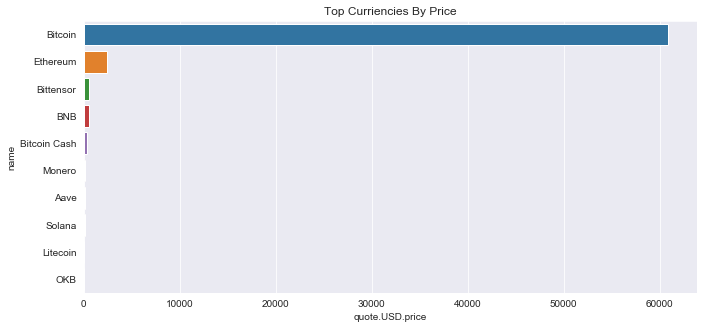

In [15]:
plt.figure(figsize=(11,5))
plt.title('Top Curriencies By Price')
sns.barplot(y='name',x='quote.USD.price',data=top,orient='h')
plt.show()

In [16]:
df1.columns

Index(['Unnamed: 0', 'id', 'name', 'symbol', 'slug', 'num_market_pairs',
       'date_added', 'tags', 'max_supply', 'circulating_supply',
       'total_supply', 'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [17]:
## grouping the data
curr=df1.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean().head(15)
curr

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.06169,-2.59966,-0.46187,6.96741,-0.39638,6.58850
Ethereum,0.36370,-1.93003,0.79953,2.29224,-9.74301,-22.15820
Tether USDt,-0.01180,-0.05167,-0.09675,-0.11360,-0.15033,-0.11862
BNB,0.16417,-1.75130,4.06406,9.98923,7.60537,9.86505
Solana,0.37771,-2.58295,-0.64520,4.53722,-9.87304,3.42938
USDC,0.01198,0.00519,-0.00008,0.00123,-0.00902,-0.00354
XRP,-0.01731,-1.02388,-1.27609,-1.93626,-10.73281,15.66566
Dogecoin,0.11131,-1.10235,2.80218,4.31498,-0.86591,1.77298
TRON,0.11027,-0.06774,3.19085,4.38014,23.85452,17.62951


In [20]:
# using stack 
curr=curr.stack()
curr=curr.to_frame(name='Values') ## putting the stacked data in a data frame
curr.reset_index(inplace=True)
curr.head()

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_1h,0.06169
1,Bitcoin,quote.USD.percent_change_24h,-2.59966
2,Bitcoin,quote.USD.percent_change_7d,-0.46187
3,Bitcoin,quote.USD.percent_change_30d,6.96741
4,Bitcoin,quote.USD.percent_change_60d,-0.39638


In [21]:
curr['level_1']=curr['level_1'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

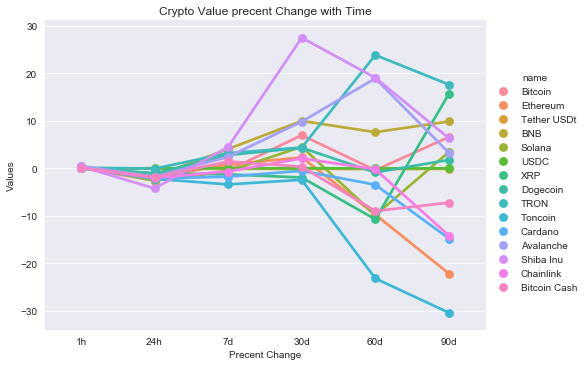

In [46]:
## catplt to visualize prcent chane movment over time
sns.catplot(x='level_1',y='Values',data=curr ,aspect=1.4,kind='point',hue='name')
plt.title('Crypto Value  Avg precent Change with Time')
plt.xlabel('Precent Change')
plt.ylabel('Values')
plt.show()

In [22]:
## filltering the data for the selected Crtptos
df2=df1[df1['name'].isin(['Bitcoin', 'Ethereum','Tether USDt','BNB'])]
df2.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19765584.00000,19765584.00000,False,nan,1,nan,nan,nan,2024-10-10T06:03:00.000Z,60861.73157,27542139971.92467,0.25070,0.03988,-2.59049,-0.45172,6.96861,-0.44453,6.66818,1202967667762.05029,56.50760,1278096363001.62012,nan,2024-10-10T06:03:00.000Z,nan,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286
1,1,1027,Ethereum,ETH,ethereum,9394,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",nan,120380316.64078,120380316.64078,True,nan,2,nan,nan,nan,2024-10-10T06:03:00.000Z,2401.64782,14675717929.42466,1.55560,0.33846,-1.88771,0.85625,2.29786,-9.76021,-22.10919,289111125400.64880,13.58060,289111125400.65002,nan,2024-10-10T06:03:00.000Z,nan,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286
2,2,825,Tether USDt,USDT,tether,99937,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",nan,119856254817.54387,121363587342.95560,True,nan,3,nan,nan,nan,2024-10-10T06:03:00.000Z,0.99879,50494450462.61858,-3.60770,-0.01737,-0.06270,-0.10665,-0.11911,-0.15298,-0.13001,119711351067.30334,5.62330,121216861258.64999,nan,2024-10-10T06:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-10 06:06:11.990286
3,3,1839,BNB,BNB,bnb,2258,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",nan,145932173.17629,145932173.17629,False,nan,4,nan,nan,nan,2024-10-10T06:03:00.000Z,571.18235,1722419145.40885,-25.34480,0.18675,-1.68036,4.09836,9.97650,7.63161,9.90751,83353881869.79100,3.91570,83353881869.78999,nan,2024-10-10T06:03:00.000Z,nan,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286
15,0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19765584.00000,19765584.00000,False,nan,1,nan,nan,nan,2024-10-10T06:05:00.000Z,60851.53362,27526493325.28410,0.24810,0.06341,-2.59852,-0.44680,6.95568,-0.39738,6.57879,1202766099220.39771,56.49820,1277882205940.81006,nan,2024-10-10T06:05:00.000Z,nan,NaN,NaN,NaN,NaN,2024-10-10 06:06:14.127139


## Prices

In [23]:
df3=df2[['name','quote.USD.price']]
df3.head()

,name,quote.USD.price
0,Bitcoin,60861.73157
1,Ethereum,2401.64782
2,Tether USDt,0.99879
3,BNB,571.18235
15,Bitcoin,60851.53362


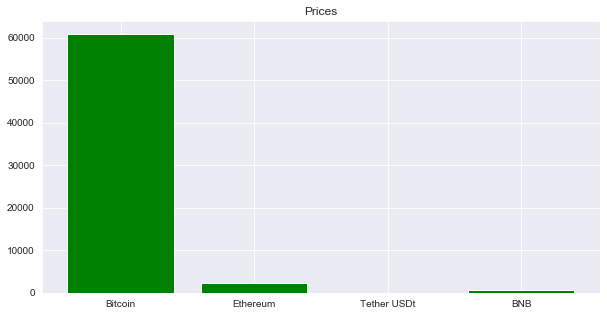

In [24]:
plt.figure(figsize=(10,5))
plt.title('Prices')
plt.bar('name','quote.USD.price',data=df3,color='green')
plt.show()

# Min -Max Prices For each crypto

In [95]:
mi=df3.groupby('name').min()
mi.reset_index(inplace=True)
mi.head()

,name,quote.USD.price
0,BNB,570.813
1,Bitcoin,60845.366
2,Ethereum,2399.560
3,Tether USDt,0.999


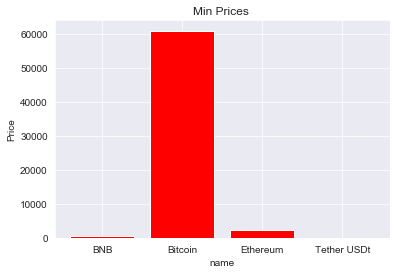

In [96]:
plt.title('Min Prices ')
plt.bar('name','quote.USD.price',data=mi,color='red')
plt.xlabel('name')
plt.ylabel('Price')
plt.show()

In [97]:
ma=df3.groupby('name').max()
ma.reset_index(inplace=True)
ma.head()

,name,quote.USD.price
0,BNB,571.182
1,Bitcoin,60865.323
2,Ethereum,2401.648
3,Tether USDt,0.999


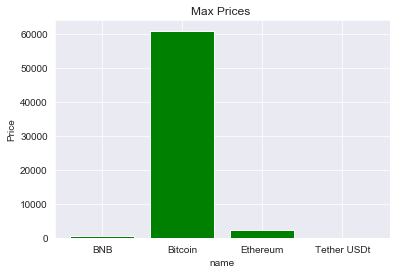

In [100]:
plt.title('Max Prices ')
plt.bar('name','quote.USD.price',data=ma,color='green')
plt.xlabel('name')
plt.ylabel('Price')
plt.show()

In [101]:
avg=df3.groupby('name').mean()
avg.reset_index(inplace=True)
avg.head()

,name,quote.USD.price
0,BNB,571.011
1,Bitcoin,60852.594
2,Ethereum,2401.010
3,Tether USDt,0.999


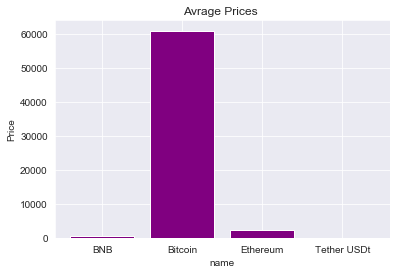

In [102]:
plt.title('Avrage Prices ')
plt.bar('name','quote.USD.price',data=avg,color='purple')
plt.xlabel('name')
plt.ylabel('Price')
plt.show()

In [67]:
dom=df1[['name','quote.USD.market_cap_dominance']]
dom.head()

,name,quote.USD.market_cap_dominance
0,Bitcoin,56.508
1,Ethereum,13.581
2,Tether USDt,5.623
3,BNB,3.916
4,Solana,3.095


In [68]:
dom=dom[dom['name'].isin(['Bitcoin','Ethereum','Tether USDt','BNB'])]
dom.head()

,name,quote.USD.market_cap_dominance
0,Bitcoin,56.508
1,Ethereum,13.581
2,Tether USDt,5.623
3,BNB,3.916
15,Bitcoin,56.498


In [74]:
dom=dom.groupby('name').max()
dom.reset_index(inplace=True)
dom

,name,quote.USD.market_cap_dominance
0,BNB,3.916
1,Bitcoin,56.537
2,Ethereum,13.581
3,Tether USDt,5.626


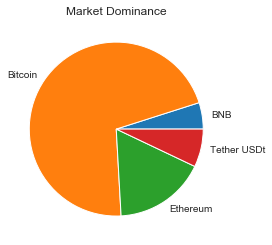

In [75]:
plt.title('Market Dominance')
plt.pie('quote.USD.market_cap_dominance',data=dom,labels='name')
plt.show()

In [25]:
df4=df1[['name','circulating_supply','total_supply']]
df4.head()

,name,circulating_supply,total_supply
0,Bitcoin,19765584.00000,19765584.00000
1,Ethereum,120380316.64078,120380316.64078
2,Tether USDt,119856254817.54387,121363587342.95560
3,BNB,145932173.17629,145932173.17629
4,Solana,469372258.45164,586278031.19003


In [26]:
pd.set_option('display.float_format',lambda x: '%.3f'%x)

## Total Supply and circulating supply

In [27]:
df5=df4[df4['name'].isin(['Bitcoin','Ethereum','Tether USDt','BNB'])].head(4)
df5

,name,circulating_supply,total_supply
0,Bitcoin,19765584.000,19765584.000
1,Ethereum,120380316.641,120380316.641
2,Tether USDt,119856254817.544,121363587342.956
3,BNB,145932173.176,145932173.176


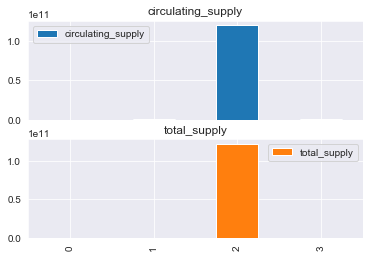

In [28]:
df5.plot(kind='bar',subplots=True)
plt.show()


## Market Captilization

In [29]:
df6=df1[['name','quote.USD.market_cap']]
df6.head()

,name,quote.USD.market_cap
0,Bitcoin,1202967667762.050
1,Ethereum,289111125400.649
2,Tether USDt,119711351067.303
3,BNB,83353881869.791
4,Solana,65886175306.139


In [30]:
## getting the max market cap value for each coin
df7=df6[df6['name'].isin(['Bitcoin','Ethereum','Tether USDt','BNB'])].groupby('name').max()
df7.reset_index(inplace=True)
df7

,name,quote.USD.market_cap
0,BNB,83353881869.791
1,Bitcoin,1203039805929.338
2,Ethereum,289111125400.649
3,Tether USDt,119741636696.273


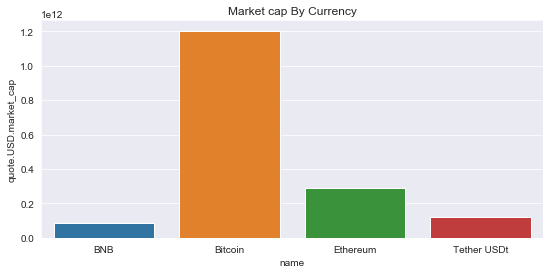

In [31]:
plt.figure(figsize=(9,4))
plt.title('Market cap By Currency')
sns.barplot(x='name',y='quote.USD.market_cap',data=df7)
plt.show()


# Time series Analysis

In [32]:
## filtering the data
df8=df1[['name','quote.USD.price','timestamp']]
df8.head()

,name,quote.USD.price,timestamp
0,Bitcoin,60861.732,2024-10-10 06:06:11.990286
1,Ethereum,2401.648,2024-10-10 06:06:11.990286
2,Tether USDt,0.999,2024-10-10 06:06:11.990286
3,BNB,571.182,2024-10-10 06:06:11.990286
4,Solana,140.371,2024-10-10 06:06:11.990286


In [33]:
## Feltiring for the selected cryptos
df8=df8[df8['name'].isin(['Bitcoin','Ethereum','Tether USDt','BNB'])]
df8.head()

,name,quote.USD.price,timestamp
0,Bitcoin,60861.732,2024-10-10 06:06:11.990286
1,Ethereum,2401.648,2024-10-10 06:06:11.990286
2,Tether USDt,0.999,2024-10-10 06:06:11.990286
3,BNB,571.182,2024-10-10 06:06:11.990286
15,Bitcoin,60851.534,2024-10-10 06:06:14.127139


In [34]:
## using the Query function
btc=df8.query('name=="Bitcoin"')

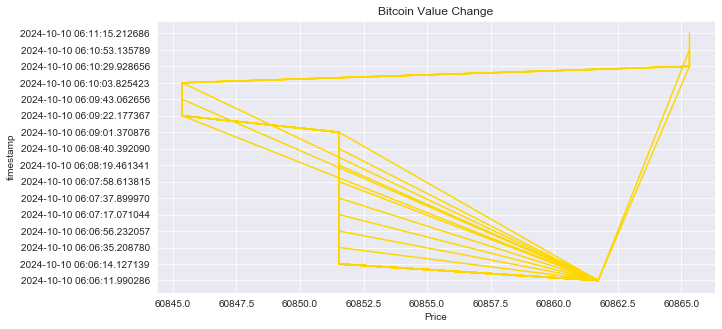

In [35]:
## used the timestamp to calculate the avg  price change over minutes and hours
plt.figure(figsize=(10,5))
plt.title('Bitcoin Value Change')
plt.plot('quote.USD.price','timestamp',data=btc,color='gold')
plt.ylabel('timestamp')
plt.xlabel('Price')
plt.show()

In [36]:
teh=df8.query('name=="Tether USDt"')

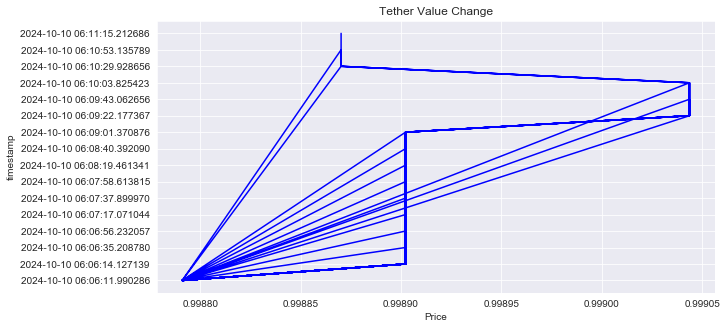

In [37]:
plt.figure(figsize=(10,5))
plt.title('Tether Value Change')
plt.plot('quote.USD.price','timestamp',data=teh,color='blue')
plt.ylabel('timestamp')
plt.xlabel('Price')
plt.show()

In [38]:
Eth=df8.query('name=="Ethereum"')

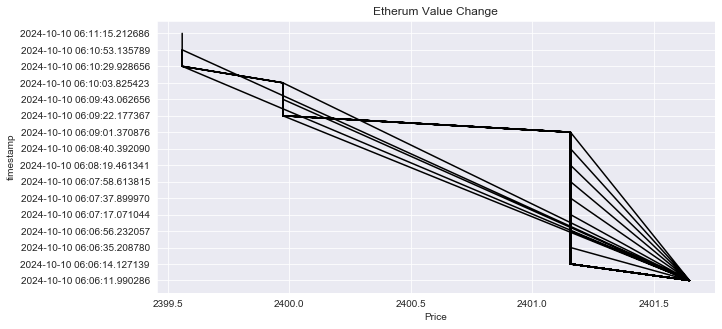

In [39]:
plt.figure(figsize=(10,5))
plt.title('Etherum Value Change')
plt.plot('quote.USD.price','timestamp',data=Eth,color='black')
plt.ylabel('timestamp')
plt.xlabel('Price')
plt.show()

In [40]:
Bn=df8.query('name=="BNB"')

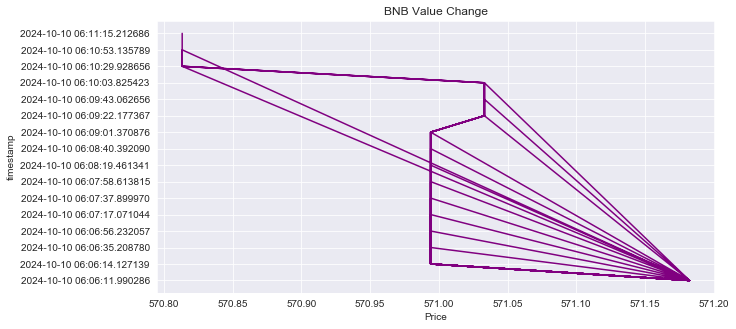

In [41]:
plt.figure(figsize=(10,5))
plt.title('BNB Value Change')
plt.plot('quote.USD.price','timestamp',data=Bn,color='purple')
plt.ylabel('timestamp')
plt.xlabel('Price')
plt.show()

In [42]:
curr1=curr[curr['name'].isin(['Bitcoin','Tether USDt','BNB','Ethereum'])]
curr1

,name,level_1,Values
0,Bitcoin,1h,0.062
1,Bitcoin,24h,-2.600
2,Bitcoin,7d,-0.462
3,Bitcoin,30d,6.967
4,Bitcoin,60d,-0.396
5,Bitcoin,90d,6.588
6,Ethereum,1h,0.364
7,Ethereum,24h,-1.930
8,Ethereum,7d,0.800
9,Ethereum,30d,2.292


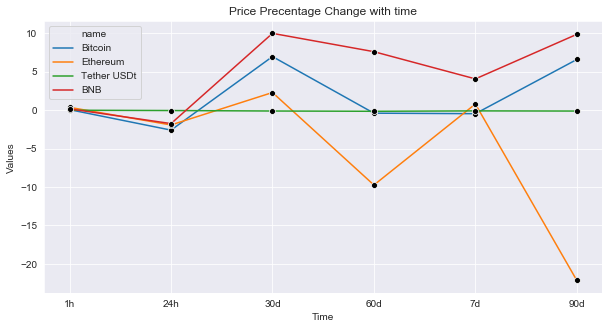

In [43]:
plt.figure(figsize=(10,5))
plt.title('Price Precentage Change with time')
sns.lineplot(x='level_1',y='Values',data=curr1,hue='name',marker='o',markerfacecolor='black')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

# Correlation Analysis

In [47]:
# Basic Correlation For tthe Data
df10=df1.drop(columns=(['Unnamed: 0','id','platform','platform.id'])).corr()
df10

,num_market_pairs,max_supply,circulating_supply,total_supply,infinite_supply,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl
num_market_pairs,1.000,-0.067,-0.042,-0.042,0.257,-0.322,0.448,0.530,-0.966,0.082,0.903,-0.024,-0.196,0.188,-0.007,-0.096,-0.077,-0.047,0.184,0.184,0.177,0.713
max_supply,-0.067,1.000,1.000,1.000,nan,-0.019,1.000,0.328,nan,-0.058,-0.038,-0.190,0.686,-0.219,0.116,0.081,-0.025,-0.020,-0.059,-0.059,-0.062,nan
circulating_supply,-0.042,1.000,1.000,1.000,-0.116,-0.101,0.992,0.186,0.156,-0.033,-0.047,-0.020,0.216,-0.159,0.136,0.150,0.044,0.008,-0.041,-0.041,-0.043,-0.623
total_supply,-0.042,1.000,1.000,1.000,-0.116,-0.101,0.994,0.181,-0.011,-0.033,-0.047,-0.020,0.216,-0.159,0.136,0.150,0.044,0.008,-0.041,-0.041,-0.043,-0.485
infinite_supply,0.257,nan,-0.116,-0.116,1.000,-0.343,0.098,0.550,nan,-0.076,0.243,-0.089,-0.227,0.100,0.035,-0.178,-0.198,-0.163,0.012,0.012,0.008,nan
cmc_rank,-0.322,-0.019,-0.101,-0.101,-0.343,1.000,-0.053,-0.674,0.735,-0.256,-0.401,-0.087,0.388,-0.306,-0.180,0.028,0.110,0.001,-0.359,-0.359,-0.360,-0.304
self_reported_circulating_supply,0.448,1.000,0.992,0.994,0.098,-0.053,1.000,0.176,nan,-0.251,0.237,-0.034,-0.324,0.443,0.253,-0.218,-0.051,-0.060,0.341,0.341,0.049,nan
self_reported_market_cap,0.530,0.328,0.186,0.181,0.550,-0.674,0.176,1.000,1.000,0.317,0.372,0.014,-0.510,0.414,0.239,-0.386,-0.347,-0.305,0.833,0.833,0.931,-0.000
tvl_ratio,-0.966,nan,0.156,-0.011,nan,0.735,nan,1.000,1.000,-0.598,0.059,-0.639,-0.290,-0.784,-0.417,0.779,-0.025,0.092,-0.562,-0.562,-0.459,-0.870
quote.USD.price,0.082,-0.058,-0.033,-0.033,-0.076,-0.256,-0.251,0.317,-0.598,1.000,0.449,-0.006,-0.122,-0.012,-0.016,-0.019,-0.051,0.004,0.975,0.975,0.977,0.916


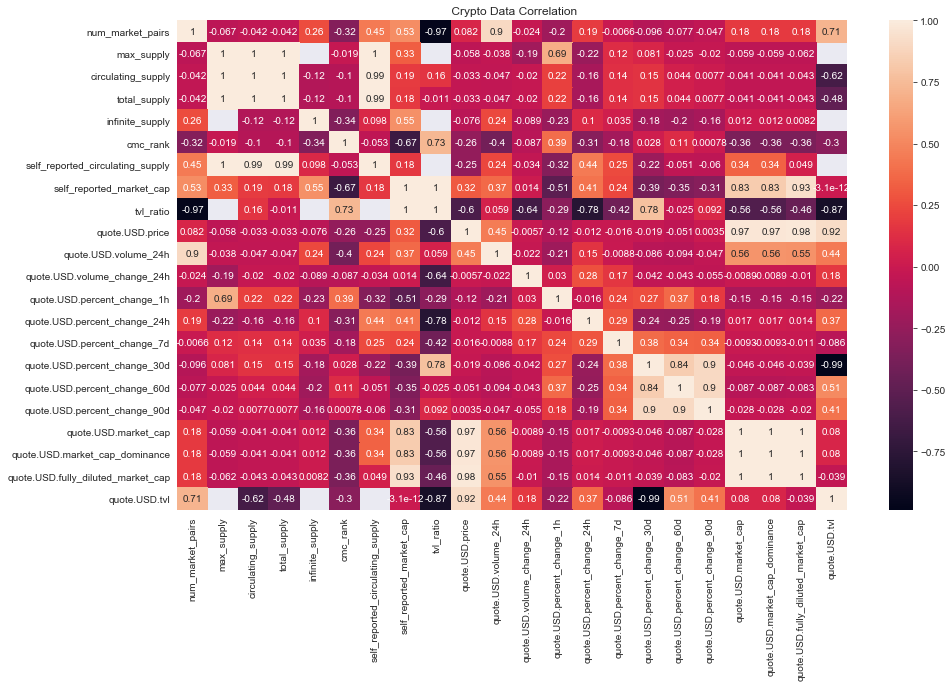

In [48]:
plt.figure(figsize=(15,9))
plt.title(' Crypto Data Correlation')
sns.heatmap(data=df10,annot=True)
plt.show()

In [51]:
df11=df1[df1['name'].isin(['Bitcoin','Ethereum','Tether USDt','BNB'])]
df11.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000,19765584.000,19765584.000,False,nan,1,nan,nan,nan,2024-10-10T06:03:00.000Z,60861.732,27542139971.925,0.251,0.040,-2.590,-0.452,6.969,-0.445,6.668,1202967667762.050,56.508,1278096363001.620,nan,2024-10-10T06:03:00.000Z,nan,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286
1,1,1027,Ethereum,ETH,ethereum,9394,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",nan,120380316.641,120380316.641,True,nan,2,nan,nan,nan,2024-10-10T06:03:00.000Z,2401.648,14675717929.425,1.556,0.338,-1.888,0.856,2.298,-9.760,-22.109,289111125400.649,13.581,289111125400.650,nan,2024-10-10T06:03:00.000Z,nan,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286
2,2,825,Tether USDt,USDT,tether,99937,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",nan,119856254817.544,121363587342.956,True,nan,3,nan,nan,nan,2024-10-10T06:03:00.000Z,0.999,50494450462.619,-3.608,-0.017,-0.063,-0.107,-0.119,-0.153,-0.130,119711351067.303,5.623,121216861258.650,nan,2024-10-10T06:03:00.000Z,1027.000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-10 06:06:11.990286
3,3,1839,BNB,BNB,bnb,2258,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",nan,145932173.176,145932173.176,False,nan,4,nan,nan,nan,2024-10-10T06:03:00.000Z,571.182,1722419145.409,-25.345,0.187,-1.680,4.098,9.977,7.632,9.908,83353881869.791,3.916,83353881869.790,nan,2024-10-10T06:03:00.000Z,nan,NaN,NaN,NaN,NaN,2024-10-10 06:06:11.990286
15,0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000,19765584.000,19765584.000,False,nan,1,nan,nan,nan,2024-10-10T06:05:00.000Z,60851.534,27526493325.284,0.248,0.063,-2.599,-0.447,6.956,-0.397,6.579,1202766099220.398,56.498,1277882205940.810,nan,2024-10-10T06:05:00.000Z,nan,NaN,NaN,NaN,NaN,2024-10-10 06:06:14.127139


In [59]:
df11.drop(columns=['Unnamed: 0','id','platform','platform.id'],inplace=True)
df11=df11.corr()

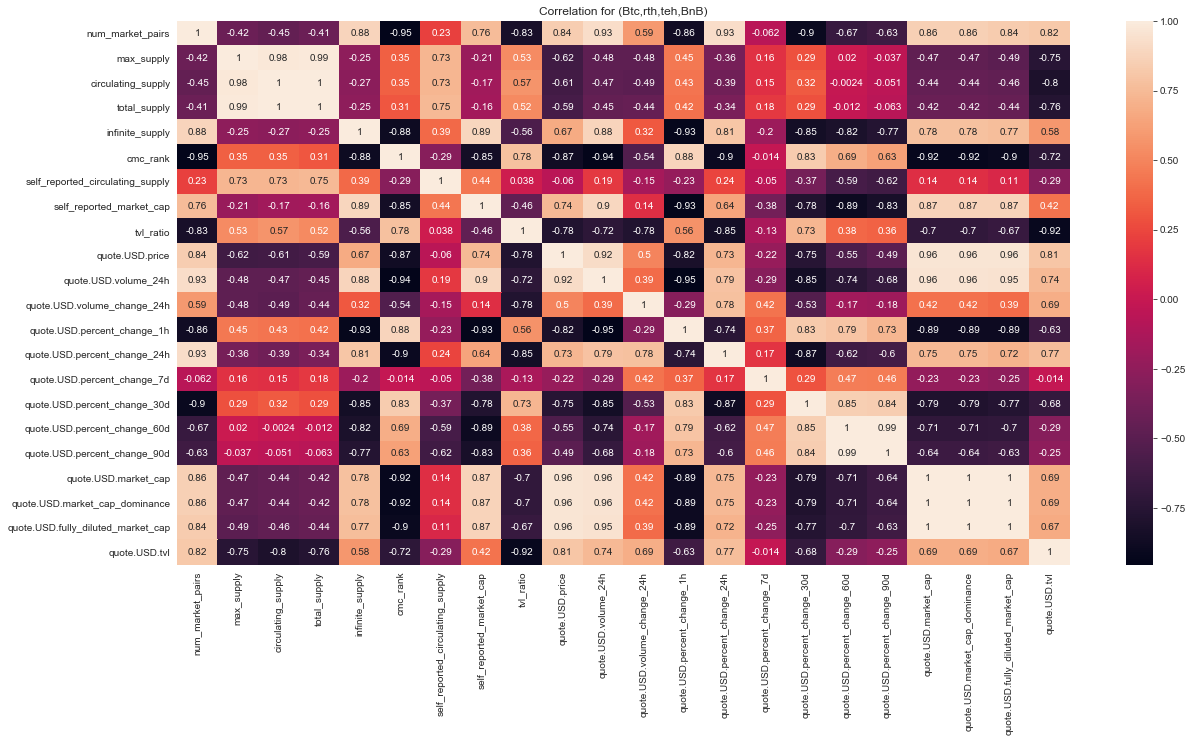

In [77]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df11,annot=True)
plt.title('Correlation for (Btc,rth,teh,BnB)')
plt.show()

In [86]:
## Correlation for Prices ad Price Changes 
cr=df1[df1['name'].isin(['Bitcoin','Ethereum','Tether USDt','BNB'])]

In [87]:
cr=cr[['name','quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance',]]
cr.head()

,name,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance
0,Bitcoin,60861.732,27542139971.925,0.251,0.040,-2.590,-0.452,6.969,-0.445,6.668,1202967667762.050,56.508
1,Ethereum,2401.648,14675717929.425,1.556,0.338,-1.888,0.856,2.298,-9.760,-22.109,289111125400.649,13.581
2,Tether USDt,0.999,50494450462.619,-3.608,-0.017,-0.063,-0.107,-0.119,-0.153,-0.130,119711351067.303,5.623
3,BNB,571.182,1722419145.409,-25.345,0.187,-1.680,4.098,9.977,7.632,9.908,83353881869.791,3.916
15,Bitcoin,60851.534,27526493325.284,0.248,0.063,-2.599,-0.447,6.956,-0.397,6.579,1202766099220.398,56.498


In [92]:
cr=cr.corr()


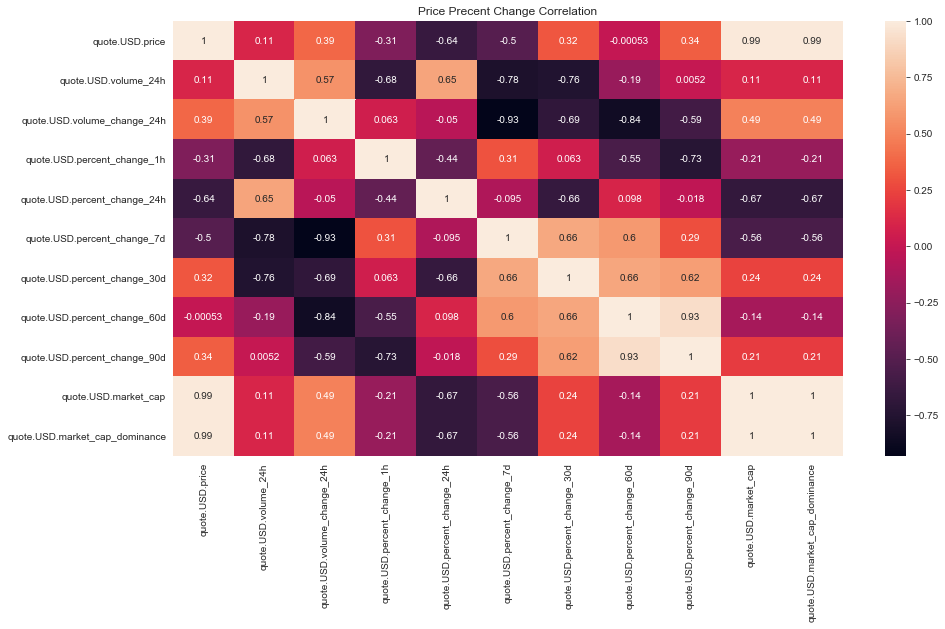

In [94]:
plt.figure(figsize=(15,8))
sns.heatmap(data=cr,annot=True)
plt.title('Price Precent Change Correlation')
plt.show()